In [60]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

More tutorials on opencv can be found:

https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [61]:
path = "tetris_blocks.png"
# path = "spheres.png"

# Image input and initial processing
Load the input image (whose path was supplied via command line argument) and display the image to our screen:

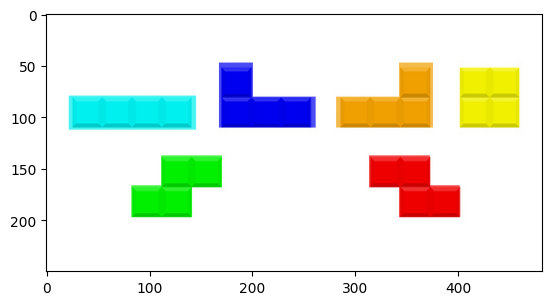

In [62]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

Convert the image to grayscale:

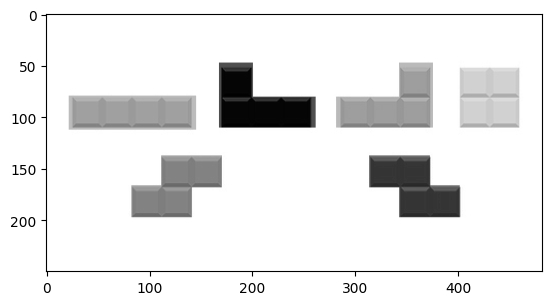

In [63]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

# Advanced processing
Apply edge detection, so we can find the outlines of objects in images:


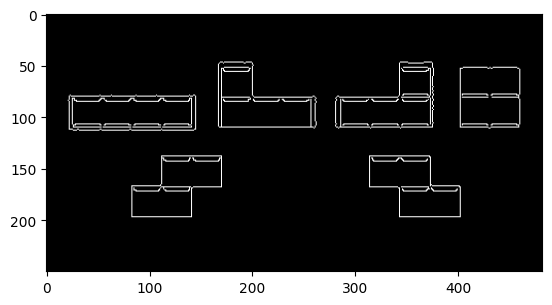

In [64]:
edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged, cmap='gray')

Threshold the image by setting all pixel values equal to or less than 225 to 255 (white; foreground): $x \le 225 \rightarrow x = 255$ and all pixel values greater than 225 to 0 (black; background): $x \gt 225 \rightarrow x=0$

Thereby we are segmenting the image.

Both the threshold (e.g. 225 in our case) and the value for pixels less than the threshold in the resulting image (255 in our case) can be tweaked.

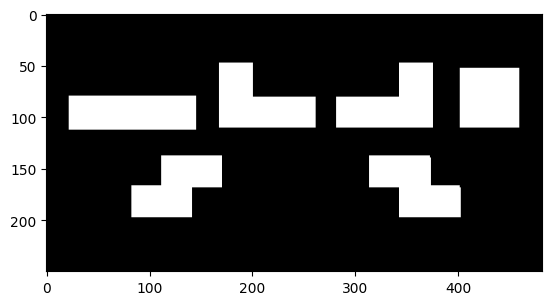

In [65]:
threshold = 225
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

Find contours (i.e., outlines) of the foreground objects in the thresholded image:

In [66]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

Loop over the contours:

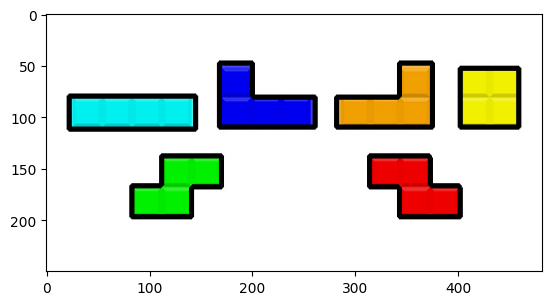

In [67]:
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)

Draw the total number of contours found in purple:

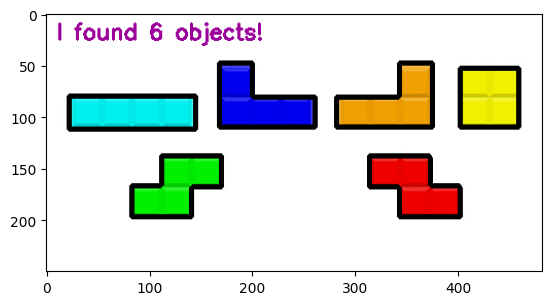

In [68]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)

We apply erosions to reduce the size of foreground objects:

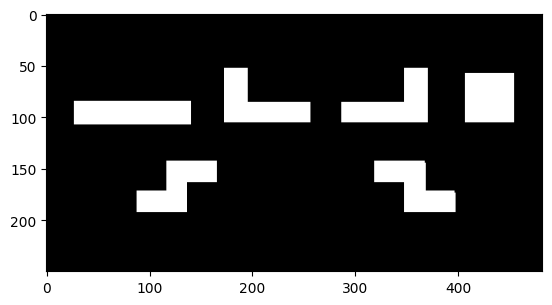

In [69]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
plt.imshow(mask, cmap = 'gray')

Similarly, dilations can increase the size of the ground objects:

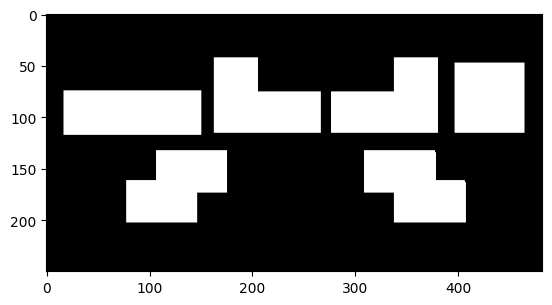

In [70]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap='gray')

A typical operation we may want to apply is to take our mask and apply a bitwise `AND` to our input image, keeping only the masked regions:

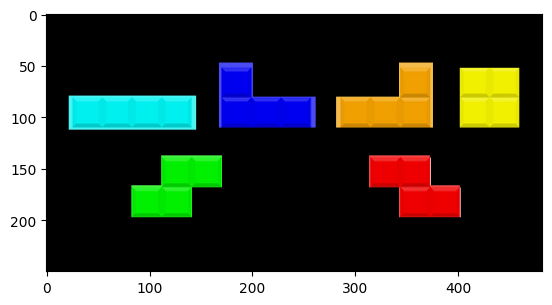

In [71]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output)

# Exercise 2
1. Can you remove the yellow square from the image?
2. Go through the tutoria, but with the `spheres.png` image. (replace `tetris_blocks.png` with `spheres.png`)
3. Tweak the parameters of the thresholding. Can you threshold all the spheres?
4. Can you remove the red sphere?
5. Can you remove the green sphere?

1. Can you remove the yellow square from the image?

(np.float64(-0.5), np.float64(481.5), np.float64(249.5), np.float64(-0.5))

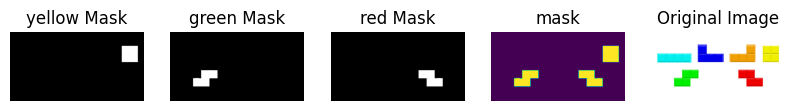

In [72]:
diff_r = np.abs(image[:,:,0] - 190)
diff_g = np.abs(image[:,:,1] - 190)
diff_b = np.abs(image[:,:,2] - 0)

diff_r_green = np.abs(image[:,:,0] - 0)
diff_g_green = np.abs(image[:,:,1] - 190)
diff_b_green = np.abs(image[:,:,2] - 0)

diff_r_red = np.abs(image[:,:,0] - 190)
diff_g_red = np.abs(image[:,:,1] - 0)
diff_b_red = np.abs(image[:,:,2] - 0)

threshold = 65

yellow_mask = (diff_r < threshold) & (diff_g < threshold) & (diff_b < threshold)
green_mask = (diff_r_green < threshold) & (diff_g_green < threshold) & (diff_b_green < threshold)
red_mask = (diff_r_red < threshold) & (diff_g_red < threshold) & (diff_b_red < threshold)

masks = [yellow_mask, green_mask, red_mask]

mask = np.sum(masks, axis=0)

mask.clip(0, 255).astype(np.uint8)

fig, axs = plt.subplots(1, 5, figsize=(10, 5))

# Display the first image
axs[0].imshow(yellow_mask, cmap='gray')  # Use cmap='gray' if apple_mask is a binary mask
axs[0].set_title('yellow Mask')
axs[0].axis('off')  # Turn off axis

axs[1].imshow(green_mask, cmap='gray')  # Use cmap='gray' if apple_mask is a binary mask
axs[1].set_title('green Mask')
axs[1].axis('off')  # Turn off axis

axs[2].imshow(red_mask, cmap='gray')  # Use cmap='gray' if apple_mask is a binary mask
axs[2].set_title('red Mask')
axs[2].axis('off')  # Turn off axis

axs[3].imshow(mask)
axs[3].set_title('mask')
axs[3].axis('off')  # Turn off axis

# Display the second image
axs[4].imshow(image)
axs[4].set_title('Original Image')
axs[4].axis('off')  # Turn off axis

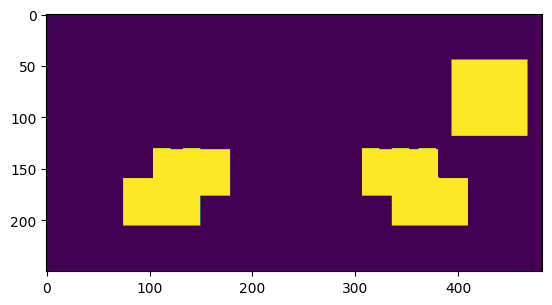

In [73]:
mask = mask.astype(np.uint8).copy()
mask_dilated = cv2.dilate(mask, None, iterations = 8)
plt.imshow(mask_dilated)

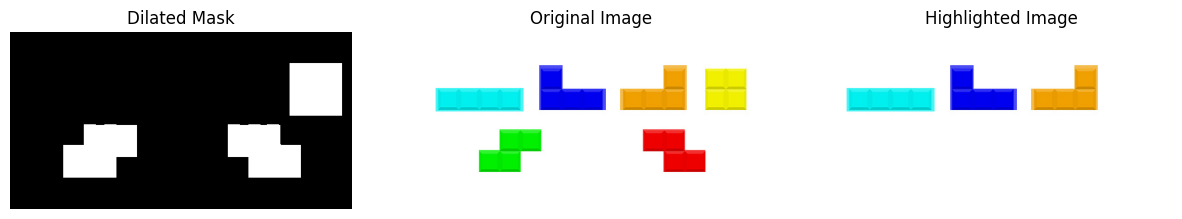

In [75]:
# yellow_mask_uint8 = yellow_mask.astype(np.uint8) * 255

# Dilate the mask
# yellow_mask_dilated = cv2.dilate(yellow_mask_uint8, None, iterations=8)

# Create a white image
white_image = np.ones_like(image) * 255

# Create a masked image
masked_image = np.where(mask_dilated[:, :, np.newaxis] == 1, white_image, image)

# Display the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Display the mask
axs[0].imshow(mask_dilated, cmap='gray')
axs[0].set_title('Dilated Mask')
axs[0].axis('off')

# Display the original image
axs[1].imshow(image)
axs[1].set_title('Original Image')
axs[1].axis('off')

# Display the masked image
axs[2].imshow(masked_image)
axs[2].set_title('Highlighted Image')
axs[2].axis('off')

plt.show()